In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the path to your script
script_path = 'get-my-data.py'

# Run the script to get your data
os.system(f'python "{script_path}"')

# Construct the file path for the CSV file in the Jupyter Notebook home directory
file_path = 'coursework-data.csv'

# Print the constructed file path to verify it
print(f"Constructed file path: {file_path}")

# Read the CSV file
df = pd.read_csv(file_path)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df.describe()

#loading a df description to get general idea of data structure
#some of the std are extremely high, indicating some possible outliers
#very high values in max row

,LUMO values,NdValence dev,gllbsc_gap,NValence mean,Eneg dev,Periodic nature,GS dev,MeltT dev,MeltT mean,Spg dev,GS mean,Number dev,Weight dev,HOMO_energy,Mendeleev dev,CovRad dev
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,-0.318680,2.220428,5.308134,6.900038,0.880011,217.056752,12.307624,493.400798,481.708041,217.056752,20.129941,147.643056,34.765422,-0.318680,22.488916,174.874591
std,0.041349,1.677656,2.317242,2.628995,0.202963,3650.926961,8.918320,285.198279,223.128903,3650.926961,8.758476,3653.412037,20.771390,0.041349,12.110542,3652.428663
min,-0.338381,0.000000,0.144493,2.666667,0.000000,0.000000,0.000000,0.000000,54.800000,0.000000,8.332000,0.000000,0.000000,-0.338381,0.000000,0.000000
25%,-0.338381,0.555556,3.652201,4.923077,0.759008,72.592593,6.064600,255.460408,290.248000,72.592593,14.012447,7.836735,18.529332,-0.338381,11.555556,32.395062
50%,-0.338381,2.370370,5.346850,6.300000,0.899592,89.306122,9.299354,439.656198,445.613333,89.306122,17.530000,13.500000,32.593504,-0.338381,24.612245,40.640000
75%,-0.320380,3.750000,6.903045,8.000000,1.036694,99.750000,16.631250,708.573750,656.466667,99.750000,23.485833,19.259259,48.064166,-0.320380,32.520000,50.040000
max,-0.144272,5.000000,11.560321,20.000000,1.325000,100000.000000,53.330000,1372.535000,1220.600000,100000.000000,80.211667,100000.000000,92.904980,-0.144272,44.571429,100000.000000


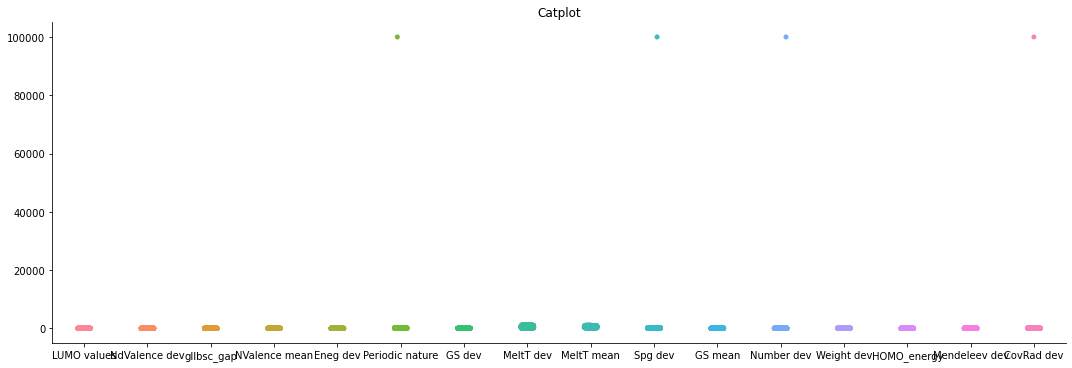

In [ ]:
sns.catplot(data=df, aspect=3)
plt.title("Catplot")
plt.show()

#catplot of all of the data to identify outliers, easy to visualize data
#some values are clearly outliers spg dev, number dev, covrad dev, periodic nature columns

In [ ]:
print(df[df['Spg dev']>20000])
print(df[df['Number dev']>20000])
print(df[df['CovRad dev']>20000])
print(df[df['Periodic nature']>20000])

#row index of outliers is looked for in this code (602, 450, 70)
#outliers are extremely large compared to the rest of the data
#arbitrarily high 20,000 will isolate outliers 

     LUMO values  NdValence dev  gllbsc_gap  NValence mean  Eneg dev  \
602    -0.338381       0.104938    7.974356       4.444444  1.006173   

     Periodic nature     GS dev   MeltT dev  MeltT mean   Spg dev    GS mean  \
602         100000.0  11.610309  756.703704  735.833333  100000.0  16.696944   

     Number dev  Weight dev  HOMO_energy  Mendeleev dev  CovRad dev  
602    8.061728   18.072174    -0.338381      30.228395    44.95679  
     LUMO values  NdValence dev  gllbsc_gap  NValence mean  Eneg dev  \
450    -0.338381            0.0    7.878152            4.8    0.8112   

     Periodic nature   GS dev  MeltT dev  MeltT mean  Spg dev  GS mean  \
450             94.8  14.7172   1143.216     1007.48     94.8   17.437   

     Number dev  Weight dev  HOMO_energy  Mendeleev dev  CovRad dev  
450    100000.0   23.237688    -0.338381          24.48       40.48  
    LUMO values  NdValence dev  gllbsc_gap  NValence mean  Eneg dev  \
70    -0.286883       0.831758    6.328975       

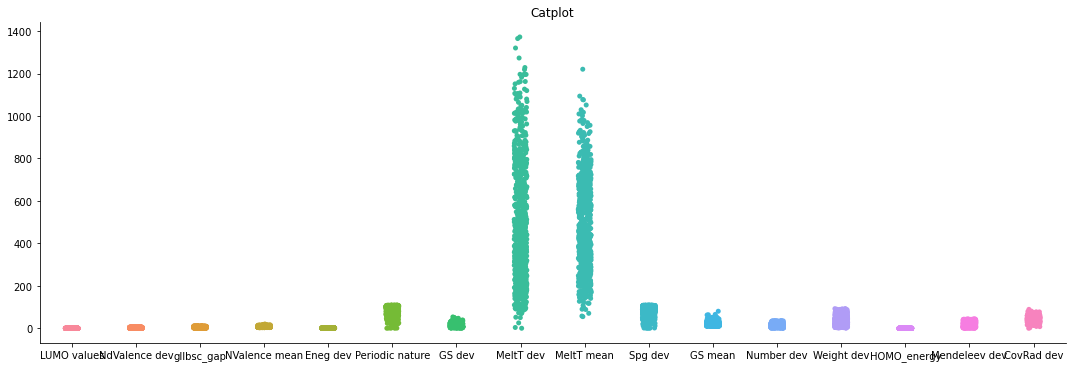

In [ ]:
df = df.drop(602)
df = df.drop(450)
df = df.drop(70)

sns.catplot(data=df, aspect=3)
plt.title("Catplot")
plt.show()

#delete rows containing outliers and reassign to dataframe
#replot catplot to verify the data is clean

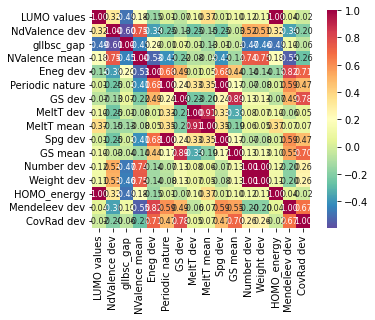

In [ ]:
correlation = df.corr()

hm = sns.heatmap(correlation,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 8},
                yticklabels=df.columns,
                 xticklabels=df.columns,
                cmap="Spectral_r")
plt.show()

#setting up correlation variable, and plotting a heatmap to identify variables that can be dropped
#some variables are correlated perfectly, meaning they are like uneccesary for regression data
#homo energy, periodic nature, number dev

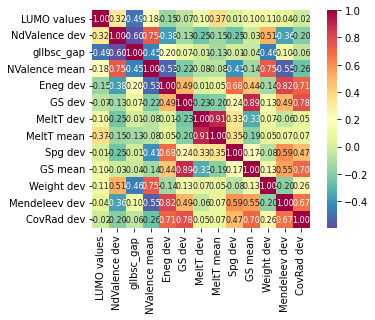

In [ ]:
df.drop(['HOMO_energy'], inplace=True, axis=1)
df.drop(['Periodic nature'], inplace=True, axis=1)
df.drop(['Number dev'], inplace=True, axis=1)

correlation = df.corr()

hm = sns.heatmap(correlation,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 8},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")
plt.show()

#removing columns with correlation >0.99 by name 
#redrawing heatmap to verify that the new data set is cleaner
#data looks good

In [ ]:
x = df.loc[:, df.columns != "gllbsc_gap"].values
y = df.loc[:, df.columns == "gllbsc_gap"].values

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

#x and y variables are defined, gllbsc_gap is assigned as the dependent variable, all others are independent
#data is standardised (mean of 0, SD of 1) so that sklearn machine learning can work with it 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,
                                  train_size=0.8)

#training data is split from main data frame, in this case 80% of the data is used for training, 20% is left for testing 

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# sklearn linear regression is fitted on training data
#y intercept and coefficients are shown
#(NDValence dev) has the largest effect on independent variable, at index of 1, -0.52)

Intercept: 
 [-0.00515239]
Coefficients: 
 [[-0.26552426 -0.52319564  0.13598641  0.33639502  0.45506853 -0.09126628
   0.12480657 -0.18244257 -0.20092489 -0.17847223 -0.02988475 -0.44926957]]


Text(0, 0.5, 'Predicted value')

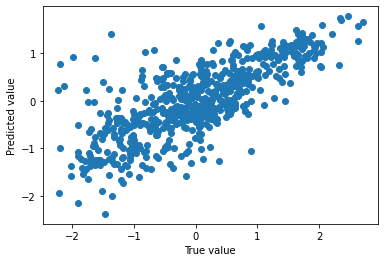

In [ ]:
predictions = regr.predict(x_train)
plt.scatter(y_train, predictions)
plt.xlabel('True value')
plt.ylabel('Predicted value')

#scatter graph of trained y values vs. models predicted y values (from x trained data)
#model appears to be relatively strong, linear correlation is seen plainly

Text(0, 0.5, 'Predicted value')

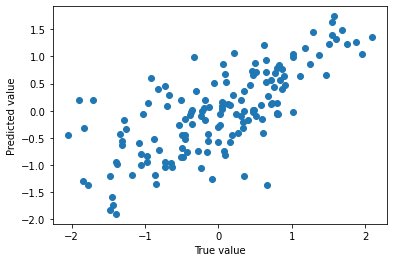

In [ ]:
predictions = regr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True value')
plt.ylabel('Predicted value')

#repeated for predicted values in the testing set
#linear relationship is evident

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(predictions, y_test))
print('Root mean squared error:', mean_squared_error(predictions, y_test, squared=False))
print('r-squared:', r2_score(y_test, predictions))

#summary of model fit statistics on test data
#r^2 shows some relatively strong correlation, errors are high

Mean squared error: 0.40701624266776987
Root mean squared error: 0.6379782462339683
r-squared: 0.5064985027838889


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor()
regr.fit(x_train, y_train)

#same principle with gradient boosted regressor

C:\Users\matya\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

Text(0, 0.5, 'Predictions')

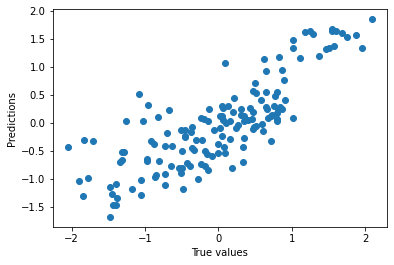

In [ ]:
predictions = regr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

#graph plotted of test data vs. predicted data 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(predictions, y_test))
print('Root mean squared error:', mean_squared_error(predictions, y_test, squared=False))
print('r-squared:', r2_score(y_test, predictions))

#model summary - performing better than linear regression, higher r squared and lower mean errors 

Mean squared error: 0.2792131965918435
Root mean squared error: 0.5284062798565546
r-squared: 0.6614579072878792


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 200, 500, 1000], "learning_rate": [0.08, 0.09, 0.1 , 0.11, 0.12]}
search_cv = GridSearchCV(regr, param_grid=param_grid, scoring="neg_mean_absolute_error", n_jobs=2, cv=10)
search_cv.fit(x_train, y_train.ravel())

print(search_cv.best_params_)

#grid search function to tweak hyperparamters optimally
#searches for model with minimum mean abs error
#best parameters are listed below

In [ ]:
best_regr = search_cv.best_estimator_
predictions = best_regr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

#optimized regression model is fitted and graphed as before 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(predictions, y_test))
print('Root mean squared error:', mean_squared_error(predictions, y_test, squared=False))
print('r-squared:', r2_score(y_test, predictions))

#model summary, best performance of all models
#highest r^2 and lowest errors